## POPULAR DATA SCIENCE QUESTIONS

In this project, Data Science Stack Exchange (DSSE) to determine what content should a data science education company create, based on interest by subject.


## What kind of information is available on Stack Exchange?

DSSE's help center's section on questions provided the following:

* Avoid subjective questions.
* Ask practical questions about Data Science — there are adequate sites for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.

## What, other than questions, does DSSE's home subdivide into?

On the `home page` we can see that we have four sections:

* `Questions` — a list of all questions asked;
* `Tags` — a list of tags (keywords or labels that categorize questions);
* `Users` — a list of users;
* `Unanswered` — a list of unanswered questions;

## What information is available in each post?

Looking, on one of the post, some of the information seen are as follow:
* For both questions and answers:
    * The posts's score;
    * The posts's title;
    * The posts's author;
    * The posts's body;
    For questions only:
* How many users have it on their "
    * The last time the question as active;
    * How many times the question was viewed;
    * Related questions;
    * The question's tags;


## Reading and Exploring the Data

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [145]:
# Read in the file into a dataframe
questions_df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
questions_df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [146]:

# finding useful information from the data.
questions_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We can see that the column FavoriteCount has a great deal of null values, with only 1407 our of 8839 total having a value.

We also see that the Tags column is listed as an object, which we will now explore more deeply in order to see if we can change the value types.

## Data Cleaning 

In [147]:
# fixing the missing values in the FavoriteCount
questions_df.fillna(value={"FavoriteCount": 0}, inplace=True)

# change the data type to int
questions_df["FavoriteCount"] = questions_df["FavoriteCount"].astype(int)

# check the data type again to see the effected changes
questions_df.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

Since there are multiple tags listed in this column, each being a string, we can create a list for each question of the tags, so that we can more easily assess how often any given tag is used.

In [148]:
questions_df["Tags"] = questions_df["Tags"].str.replace("^<|>$", "").str.split("><")
questions_df["Tags"]

0                         [machine-learning, data-mining]
1       [machine-learning, regression, linear-regressi...
2            [python, time-series, forecast, forecasting]
3                   [machine-learning, scikit-learn, pca]
4                [dataset, bigdata, data, speech-to-text]
                              ...                        
8834      [pca, dimensionality-reduction, linear-algebra]
8835                       [keras, weight-initialization]
8836                     [python, visualization, seaborn]
8837                                        [time-series]
8838                                               [k-nn]
Name: Tags, Length: 8839, dtype: object

## Analysing Tags

Most popular tags are determined. This is done by considering two different popularity proxies: 
* number of times the tag was used, and 
* the number of times a question with that tag was viewed.

In [149]:
# counting how many times each tag was used
tag_count = dict()

for Tags in questions_df["Tags"]:
    for tag in Tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1          

For clarity and improved aesthetics, tag_counts is transform into a dataframe.

In [150]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.sort_values(by="Count", ascending=False, inplace=True )
top_count = tag_count.head(10)
top_count



,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


The total count the 10 most used tags is shown in the table above. Machine-learning is the most tagged subject by a great margin, Python is second, followed by Deep-Learning and Neural-Networks

To visualize this information, the values are plotted together using a bar chart.

Text(0.5, 1.0, 'Top Ten Tags')

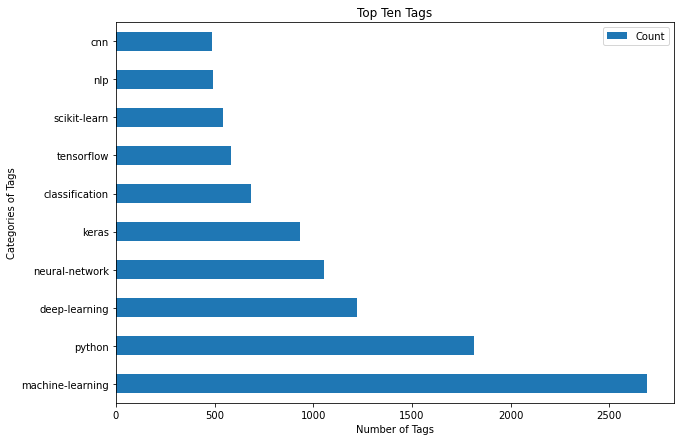

In [151]:
top_count.plot(kind='barh', figsize=(10,7))
plt.xlabel("Number of Tags")
plt.ylabel("Categories of Tags")
plt.title("Top Ten Tags")


In [152]:
# Count how many times each tag was viewed.

tag_view_count = dict()
for index, row in questions_df.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row["ViewCount"]
        else:
            tag_view_count[tag] = row["ViewCount"]
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)
tag_view_count.sort_values(by="ViewCount", ascending=False, inplace=True )    
top_view = tag_view_count.head(10)
top_view

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


Python is the most viewed category, even though it was the second highest tagged, and it switched places with machine learning. Deep Learning and Neural Networks are both behind Keras in total views, despite being both tagged more often. Pandas also has more views that Neural Network

Visualising this result gives better insight.

Text(0.5, 1.0, 'Top Ten Views')

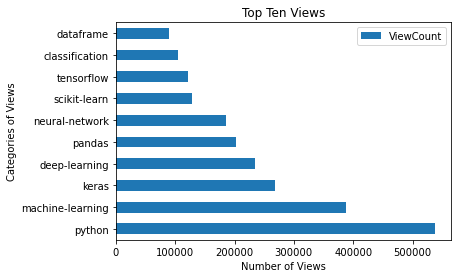

In [153]:
top_view.plot(kind='barh')
plt.xlabel("Number of Views")
plt.ylabel("Categories of Views")
plt.title("Top Ten Views")

Visualising the two plotted graphs side by side, will further enhance the clearity of visualisation.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000E02FBA5970>],
      dtype=object)

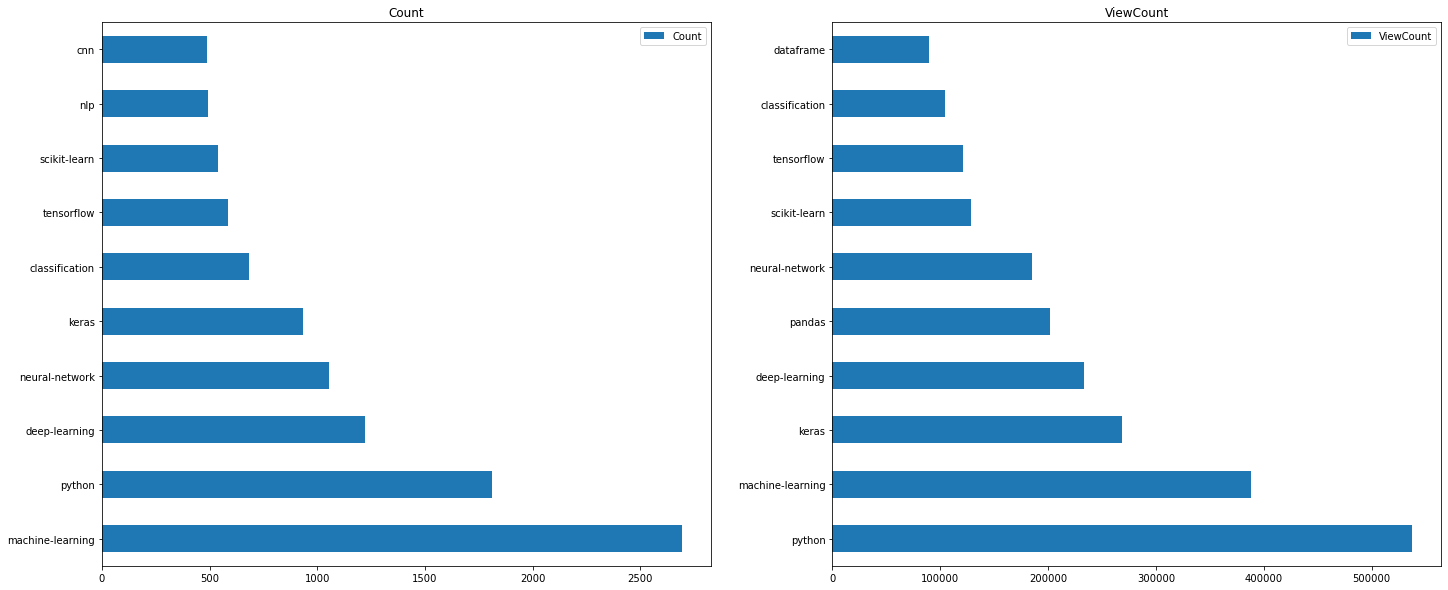

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,10))
top_count.plot(kind="barh", ax=axes[0], subplots=True)
top_view.plot(kind="barh", ax=axes[1], subplots=True)

## Is Deep Learning Here To Stay?

In [155]:
# read in a file into a dataframe called all_q. We'll parse the dates at read-time.
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [156]:
# clean the tags column.
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")
all_q["Tags"].head()

0        [python, keras, tensorflow, cnn, probability]
1                                     [neural-network]
2                        [python, ibm-watson, chatbot]
3                                              [keras]
4    [r, predictive-modeling, machine-learning-mode...
Name: Tags, dtype: object

tags is filtered to just the ones involving Deep Learning. This consists of ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [157]:
dl_set = ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]
def deep_learning(tags):
    for tag in tags:
        if tag in dl_set:
            return 1
        else:
            return 0
all_q["Deep_Learning"] = all_q["Tags"].apply(deep_learning)
all_q.head()        

,Id,CreationDate,Tags,Deep_Learning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


In this analysis, info is based on the quarter of each year, beginning from 2020 and working backwards in time. However, the quarter for the most recent entries is not complete, hence 2019 is considered in the analysis.

In [158]:
# getting rid of 2020 data
all_q = all_q[all_q["CreationDate"].dt.year < 2020]


In [159]:
# A column that identifies the quarter in which a question was asked is created.
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)
all_q.head()

,Id,CreationDate,Tags,Deep_Learning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


## Deep Learning Quarterly Popularity

In [160]:
questions_per_quarter = all_q.groupby("Quarter").agg({"Deep_Learning":['sum','size']})
questions_per_quarter.head()

Deep_Learning     
                  sum size
Quarter                   
14Q2                3  157
14Q3                4  189
14Q4                4  216
15Q1                5  190
15Q2                6  284

In [161]:
# renaming the columns
questions_per_quarter.columns = ['DL_Questions', 'Total_Questions']
questions_per_quarter.head()


,DL_Questions,Total_Questions
Quarter,,
14Q2,3,157
14Q3,4,189
14Q4,4,216
15Q1,5,190
15Q2,6,284


In [162]:
# Add column for the percentage of Deep learning questions
questions_per_quarter['DL_percentage'] = questions_per_quarter['DL_Questions']/questions_per_quarter["Total_Questions"]
questions_per_quarter.head(10)

,DL_Questions,Total_Questions,DL_percentage
Quarter,,,
14Q2,3,157,0.019108
14Q3,4,189,0.021164
14Q4,4,216,0.018519
15Q1,5,190,0.026316
15Q2,6,284,0.021127
15Q3,13,311,0.041801
15Q4,19,382,0.049738
16Q1,38,516,0.073643
16Q2,45,518,0.086873


In [163]:
# This is done to help with visualizations
questions_per_quarter.reset_index(inplace=True)
questions_per_quarter.head()

,Quarter,DL_Questions,Total_Questions,DL_percentage
0,14Q2,3,157,0.019108
1,14Q3,4,189,0.021164
2,14Q4,4,216,0.018519
3,15Q1,5,190,0.026316
4,15Q2,6,284,0.021127


## Data Visualisation

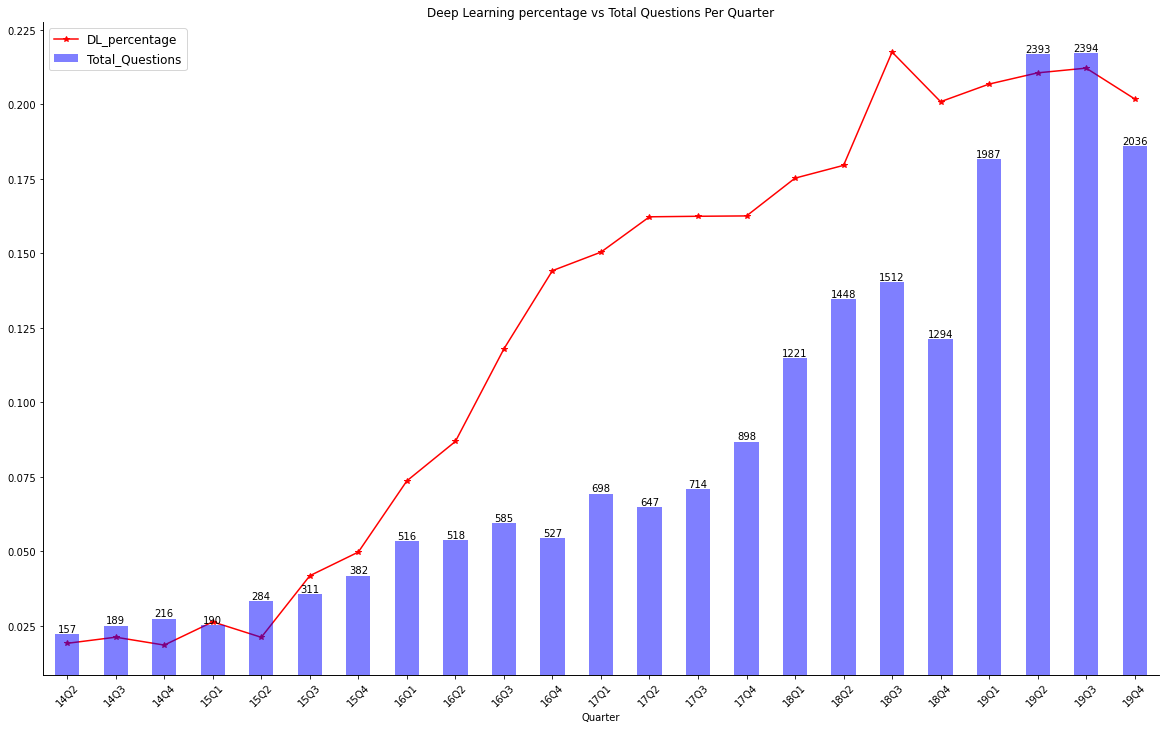

In [164]:
ax1 = questions_per_quarter.plot(x="Quarter",y="DL_percentage",kind="line", linestyle = "-", marker = "*", color = "red", figsize=(20,12))
ax2 = questions_per_quarter.plot(x="Quarter",y="Total_Questions", kind="bar",ax=ax1, secondary_y=True,alpha=0.5, rot=45, color="blue")

for idx, t in questions_per_quarter["Total_Questions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

for ax in (ax1,ax2):
    for loc in ("top", "right"):
        ax.spines[loc].set_visible(False)
        ax.tick_params(right=False, labelright = False)

plt.title("Deep Learning percentage vs Total Questions Per Quarter")



plt.show()

## Conclusion 

The presentation of the result in the graph above is a clear indication of the rise in popularity of Deep Learning starting in the middle of 2015, with the percentages of questions asked rising steadily all the way through the middle of 2018. However, a drop is observed in the last quarter of 2018 before it picks up again.

The steady rise in popularity of Deep Learning may not be unconnected with the increase in the awareness and alertness in the power of data technology.